# Finite Difference Method for the Helmholtz Equation on the Unit Square 

Solves the Poisson equation $\bigtriangleup u(x,y) + k^2 u(x,y)= f(x,uy)$ on the unit square domain $\Omega=(0,1)^2$ supplied with various boundary conditions and various source terms. The finite difference method on a uniform mesh is employed. 

## Import Packages

In [2]:
using LinearAlgebra
using SparseArrays
using Plots
using LaTeXStrings
using BenchmarkTools 

## First Example: Two-Dimensional Finite Difference Code

Some comments goes here. 

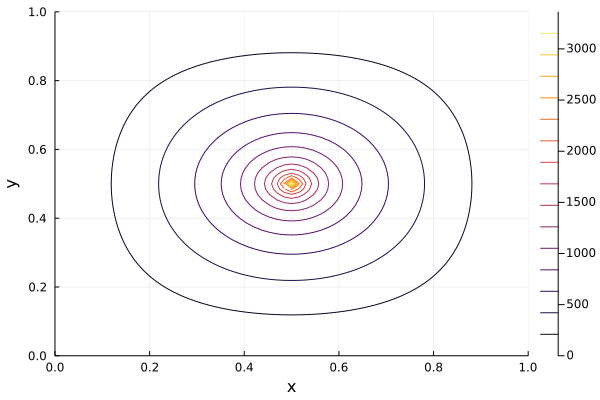

In [3]:
#..set the wave number (in [1/m]) and its square (in [1/m^2]) 
kwav = 30; 
kwav2 = kwav*kwav; 

#..set the number of grid points per wavelength (gpw)
gpw = 10;  

#..set the mesh width h to ensure a given number of grid points per wavelength (kwav h = gpw) (requires more work)
h = gpw/kwav; 

#..compute the number of element. Augment number of elements in case that number of elements is odd 
N = round(Int,1/h)
if isodd(N) N+=1 end 
N = 16*N; 
h=1/N; h2 = h*h;

#..construct the 2D mesh (X) starting from the 1D mesh (x)  
#..observe that we make in the 2D mesh the x coordinate increase from left to right and 
#..the y coordinate increase from top to bottom (as expected)
x = Vector(0:h:1); 
y = Vector(0:h:1); 
X = repeat(reshape(x, 1, :), length(y), 1);
Y = repeat(y, 1, length(x));

#..compute derived numbers such as 
#..the points on the boundary (Nbnd) and the mesh width (h)
Np1 = length(x); Nm1 = N-1; Np2 = Np1*Np1; Nm2 = Nm1*Nm1; Nbnd = 4*N; 

#..construct the mesh indicator matrix IG 
#..this indicator matrix will allow to distinguish interior and boundary nodes 
#..in this indicator matrix the boundary nodes are easy to identify 
#..for interior nodes IG(i,j) = 0 and for the boundary nodes IG(i,j) = 1
#..next construct the indicator vector IGvec by reshaping the indicator matrix IG  
IG = ones(Np1,Np1); 
IG[2:end-1,2:end-1] = zeros(Nm1,Nm1); 
IGvec = reshape(IG,Np2,1); 
#..construct array with linear indices allowing to define interior and boundary nodes 
#..interior: index array with all indices of the interior nodes 
#..boundary: index array with indices of all the boundary nodes 
L = LinearIndices(IGvec); 
interior_cartesian = findall(x->x==0,IGvec);  interior = L[interior_cartesian]; 
boundary_cartesian = findall(x->x>0,IGvec); boundary = L[boundary_cartesian]; 

#..construct auxiliary vectors used in the 1D code as well 
e = ones(Np1);            #..same as in 1D.. 
e_bnd = ones(Nbnd); #..used to handle the boundary nodes 

#..Construct one-dimensional matrix
A1 = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
I = Diagonal(e); 
I_bnd = Diagonal(e_bnd); 

#..Construct the 2D matrix using Kronecker products 
A = kron(A1,I) + kron(I,A1); 

#..Construct the right-hand side vector 
F = zeros(size(IG)); 
F[Np1÷2+1,Np1÷2+1]=1/h2;    
#..Reshape the F 2D array into an f vector 
f = reshape(F,Np2); 

#..Handle the Dirichlet boundary conditions in the matrix and the right-hand side vector 
A[boundary,boundary] = I_bnd; A[boundary,interior] = zeros(Nbnd, Nm2); 
A = sparse(A)
f[boundary] = zeros(Nbnd); 

#..solve the linear system for the finite difference approximation 
u = A \ f; 

#..reshape the computed approximation 
U = reshape(u,Np1,Np1); 

#..plot the computed approximation as a contour plot 
contour(x, y, U, xlabel="x", ylabel="y")

## Exercises

Extend above to diffusion-reaction (linear and non-linear), convection-diffusion (linear and non-linear), parabolic heat equation, hyperbolic wave propagation (time and frequency domain), second order elements and adaptive mesh refinement.  

## References

1. The finite difference method on wikipedia [wiki](https://en.wikipedia.org/wiki/Finite_element_method). Especially Section 5 of this page is revelant here. 